In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString as ls
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
import scipy.constants as con
from scipy import stats
e = 2.718281828

# Teil 1 

## 1.0 Allgemeines

In [3]:
transfer = pd.read_csv("Data/QM1/initial setup/spectrum.dat",sep=' ',decimal=".",header=None)
transfer

,0,1
0,10.0,0.465
1,20.0,0.411
2,30.0,0.662
3,40.0,0.596
4,50.0,0.596
...,...,...
975,9960.0,0.364
976,9970.0,0.358
977,9980.0,0.362
978,9990.0,0.360


\SI{480 \pm 10}{hertz}
\SI{2020 \pm 10}{hertz}
\SI{4630 \pm 10}{hertz}


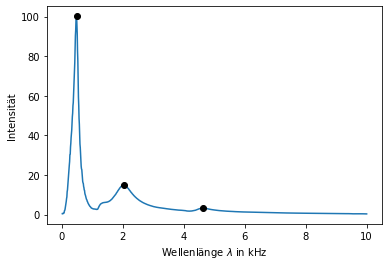

In [129]:
plt.plot(transfer[0]/1000,transfer[1],zorder=0)
x=transfer[0]
y=transfer[1]

peaks = find_peaks(y,height=0, width=9) 
height = peaks[1]['peak_heights']
peak_pos = x[peaks[0]]
plt.scatter(peak_pos/1000 , height,c="k")
plt.xlabel("Wellenlänge $\lambda$ in kHz")
plt.ylabel("Intensität")
# plt.grid(axis="x")
plt.savefig('Bilder/qm/Teil1/transfer.png',dpi=300)
for p in peak_pos:
    print("\SI{" + str(int(p)) + " \pm 10}{hertz}")

## 1.1 der Rohrresonator

In [5]:
r15 = pd.read_csv("Data/QM1/Teil1/150mm.dat",sep=' ',decimal=".",header=None)
r60 = pd.read_csv("Data/QM1/Teil1/600mm.dat",sep=' ',decimal=".",header=None)
r15oszi = [[470,2000,4600],[1,3,4]]

\SI{475 \pm 10}{hertz}
\SI{1170 \pm 10}{hertz}
\SI{2340 \pm 10}{hertz}
\SI{3480 \pm 10}{hertz}
\SI{4625 \pm 10}{hertz}
\SI{5770 \pm 10}{hertz}
\SI{6915 \pm 10}{hertz}
\SI{8065 \pm 10}{hertz}
\SI{9210 \pm 10}{hertz}
\SI{10365 \pm 10}{hertz}
\SI{11505 \pm 10}{hertz}
\SI{12655 \pm 10}{hertz}
\SI{13790 \pm 10}{hertz}
\SI{14970 \pm 10}{hertz}
\SI{16085 \pm 10}{hertz}


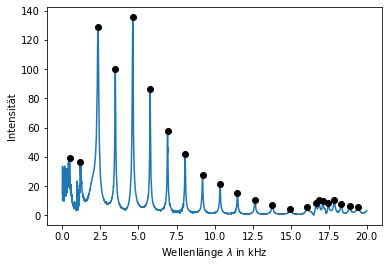

In [130]:
plt.plot(r15[0]/1000,r15[1],zorder=0)
x=r15[0]
y=r15[1]
peaks , _ = find_peaks(y,height=4, width=9) 
# height = peaks[1]['peak_heights']
peak_pos1 = x[peaks]
# peaks , _= find_peaks(y,height=4, width=9) 
results_lambda1 = peak_widths(y, peaks, rel_height=1/e)
plt.scatter(x[peaks]/1000 , y[peaks],c="k")


#plt.hlines(*results_lambda[1:])

axes = plt.gca()
# axes.set_xlim(15000,20000)
# axes.set_ylim(0,150)
plt.xlabel("Wellenlänge $\lambda$ in kHz")
plt.ylabel("Intensität")
# plt.grid()
plt.savefig('Bilder/qm/Teil1/spektrum-kurz.png',dpi=300)
for p in peak_pos1[0:15]:
    print("\SI{" + str(int(p)) + " \pm 10}{hertz}")
# results_lambda1[0]

[1.03992339] [0.01420451]


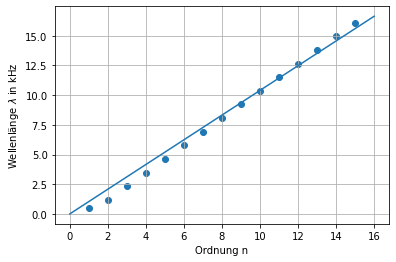

In [101]:
x=np.add(range(len(peak_pos1[0:15])),1)
y=peak_pos1[0:15]/1000
plt.ylabel("Wellenlänge $\lambda$ in kHz")
plt.xlabel("Ordnung n")

def fit(x,m):
    return m*x 

plt.scatter(x,y)
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)


xf = np.linspace(0,16,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")
plt.grid()

plt.savefig('Bilder/qm/Teil1/schallgeschw-fit.png',dpi=300)


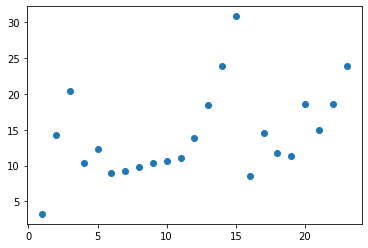

In [8]:
plt.scatter(np.add(range(len(results_lambda1[0])),1),results_lambda1[0])

\SI{480 \pm 50}{hertz}
\SI{2020 \pm 50}{hertz}
\SI{4630 \pm 50}{hertz}


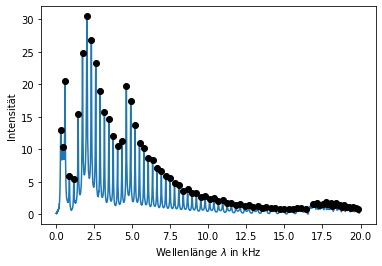

In [141]:
plt.plot(r60[0]/1000,r60[1],zorder=0)
x=r60[0]
y=r60[1]
# peaks = find_peaks(y,height=0, width=6) 
# height = peaks[1]['peak_heights']
# peak_pos2 = x[peaks[0]]
# plt.scatter(peak_pos2[0:58] , height[0:58],c="k")
# peak_pos2[0:58]
peaks , _ = find_peaks(y,height=0, width=6) 
# height = peaks[1]['peak_heights']
peak_pos2 = x[peaks]
# peaks , _= find_peaks(y,height=4, width=9) 
results_lambda2= peak_widths(y, peaks, rel_height=1/e)
plt.scatter(x[peaks]/1000 , y[peaks],c="k")

# plt.scatter(x[peaks] , y[peaks]/e,c="r")

#plt.hlines(*results_half[1:])
plt.xlabel("Wellenlänge $\lambda$ in kHz")
plt.ylabel("Intensität")

axes = plt.gca()
# axes.set_xlim(0,2000)
#axes.set_ylim(0,40)
plt.savefig('Bilder/qm/Teil1/spektrum-lang.png',dpi=300)

for p in peak_pos:
    print("\SI{" + str(int(p)) + " \pm 50}{hertz}")

# results_lambda2[0]

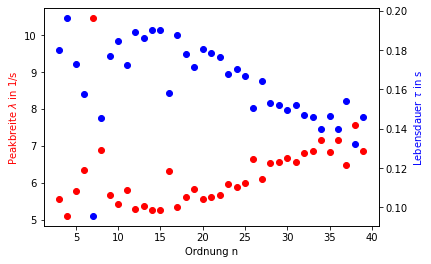

In [104]:

fig, ax1 = plt.subplots()
ax1.set_xlabel("Ordnung n")
ax1.set_ylabel("Peakbreite $\lambda$ in 1/s",c="r")


ax1.scatter(np.add(range(len(results_lambda2[0][3:40])),3),results_lambda2[0][3:40],c ="r")

ax2 = ax1.twinx()
ax2.set_ylabel(r"Lebensdauer $\tau$ in s",c="b")

ax2.scatter(np.add(range(len(results_lambda2[0][3:40])),3),1/results_lambda2[0][3:40],c="b")

plt.savefig('Bilder/qm/Teil1/Lebensdauer.png',dpi=300)

# axes = plt.gca()
# axes.set_xlim(0,2000)
# axes.set_ylim(4.5,8)

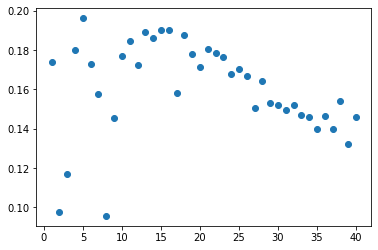

In [11]:
plt.scatter(np.add(range(len(results_lambda2[0][:40])),1),1/results_lambda2[0][:40])
axes = plt.gca()
# axes.set_xlim(0,2000)
# axes.set_ylim(0.13,0.2)

[1.19115555 2.33160258 0.10218321] [0.07439427 0.00250534 0.00396238]


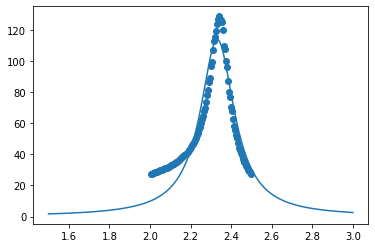

In [666]:

def lorentz(x, amp, cen, wid):
    return y0 + amp/((x-cen)**2 + wid**2)

x = r15[0][400:500]/1000
y = r15[1][400:500]
plt.scatter(x,y,zorder=0)


c, cov = curve_fit(lorentz, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

xf = np.linspace(1.5,3,500)
yf = lorentz(xf, c[0],c[1],c[2])
plt.plot(xf,yf, label="fit")


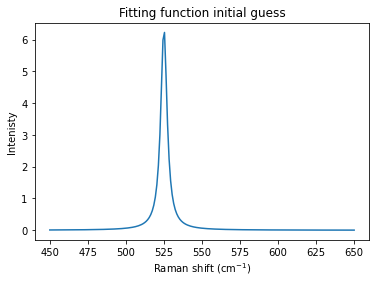

In [13]:
# The Lorentz function https://www.wikiwand.com/en/Cauchy_distribution
def lorentz(x, y0, amp, cen, wid):
    return y0 + (2*amp/np.pi)*(wid/(4*(x-cen)**2 + wid**2))

xtest = np.linspace(450,650,200)
y0 = 0
amp = 50
cen = 525
wid = 5

ytest = lorentz(xtest,y0,amp,cen, wid)
plt.plot(xtest,ytest)
plt.title("Fitting function initial guess")
plt.ylabel("Intenisty")
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.show()

[956.53846154] [174.96090027]
[1039.92338706] [14.20450685]


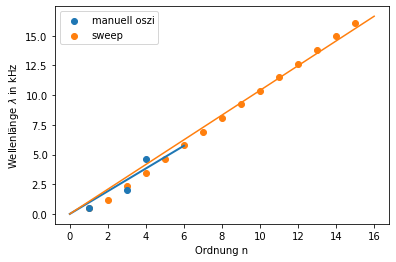

In [140]:
def fit(x,m):
    return m*x 

x = r15oszi[1]
y = r15oszi[0]
plt.scatter(x,np.divide(y,1000),zorder=2,label="manuell oszi")
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

mo = [c[0],perr[0]]


xf = np.linspace(0,6,500)
yf = fit(xf, c[0])
plt.plot(xf,yf/1000,zorder=2,lw=2)


x = np.add(range(len(peak_pos1[0:15])),1)
y = peak_pos1[0:15]
plt.scatter(x,y/1000,label="sweep")

    
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

m = [c[0],perr[0]]

xf = np.linspace(0,16,500)
yf = fit(xf, c[0])
plt.plot(xf,yf/1000)

plt.ylabel("Wellenlänge $\lambda$ in kHz")
plt.xlabel("Ordnung n")
plt.legend()

plt.savefig('Bilder/qm/Teil1/transfer.png',dpi=300)

           
# x = np.add(range(len(peak_pos2[0:10])),1)
# y = peak_pos2[0:10]
# plt.scatter(x,y)

           
# c, cov = curve_fit(fit, x,y)
# perr = np.sqrt(np.abs(np.diag(cov)))
# print(c,perr)

# xf = np.linspace(0,11,500)
# yf = fit(xf, c[0])
# plt.plot(xf,yf, label="fit")

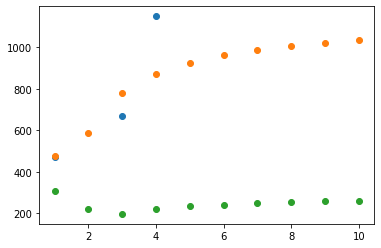

In [15]:
plt.scatter(r15oszi[1], np.divide(r15oszi[0],r15oszi[1]))
plt.scatter(np.add(range(len(peak_pos1[0:10])),1),np.divide(peak_pos1[0:10],np.add(range(len(peak_pos1[0:10])),1)))
plt.scatter(np.add(range(len(peak_pos2[0:10])),1),np.divide(peak_pos2[0:10],np.add(range(len(peak_pos2[0:10])),1)))

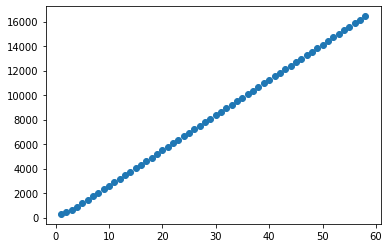

In [16]:
# plt.scatter(r15oszi[1], np.divide(r15oszi[0],r15oszi[1]))
# plt.scatter(np.add(range(len(peak_pos1)),1),np.divide(peak_pos1,np.add(range(len(peak_pos1)),1)))
plt.scatter(np.add(range(len(peak_pos2[0:58])),1),peak_pos2[0:58])

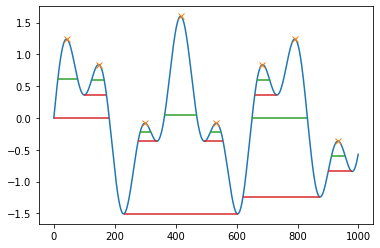

In [17]:
x = np.linspace(0, 6 * np.pi, 1000)
x = np.sin(x) + 0.6 * np.sin(2.6 * x)
peaks, _ = find_peaks(x)
results_half = peak_widths(x, peaks, rel_height=0.5)
results_full = peak_widths(x, peaks, rel_height=1)

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")

## 1.2  der Kugelresonator ohne Zwischenringe

In [18]:
deg0 = pd.read_csv("Data/QM1/Teil2/0deg.dat",sep=' ',decimal=".",header=None)
deg45 = pd.read_csv("Data/QM1/Teil2/45deg.dat",sep=' ',decimal=".",header=None)
deg90 = pd.read_csv("Data/QM1/Teil2/90deg.dat",sep=' ',decimal=".",header=None)
deg180 = pd.read_csv("Data/QM1/Teil2/180deg.dat",sep=' ',decimal=".",header=None)
winkelmessreihen = [deg0,deg45,deg90,deg180]
winkel = [0,45,90,180]

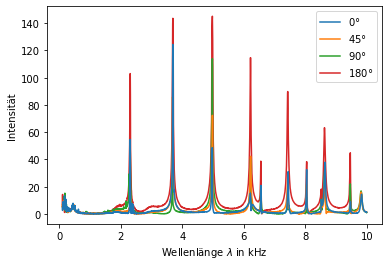

In [111]:
for (x, i) in zip(winkelmessreihen,winkel):
    plt.plot(x[0]/1000,x[1],label = f"{i}$\degree$",zorder = -i)

plt.xlabel("Wellenlänge $\lambda$ in kHz")
plt.ylabel("Intensität")
    
plt.legend()
# plt.yscale("log")
plt.savefig('Bilder/qm/Teil1/spektrum-kugelres-winkel.png',dpi=300)


### Doppelmax bei 5k

In [20]:
k5deg0 = pd.read_csv("Data/QM1/Teil2/5k-0deg.dat",sep=' ',decimal=".",header=None)
k5deg90 = pd.read_csv("Data/QM1/Teil2/5k-90deg.dat",sep=' ',decimal=".",header=None)
k5deg180 = pd.read_csv("Data/QM1/Teil2/5k-180deg.dat",sep=' ',decimal=".",header=None)
k5WinkelReihe = [k5deg0,k5deg90,k5deg180]
k5winkel = [0,90,180]

# k5main = pd.read_csv("Data/QM1/Teil2/5000Hz2.dat",sep=' ',decimal=".",header=2)
# k5left = pd.read_csv("Data/QM1/Teil2/5k-left.dat",sep=' ',decimal=".",header=2)
# k5left2 = pd.read_csv("Data/QM1/Teil2/5k-left-2.dat",sep=' ',decimal=".",header=2)
# k5orbital = [k5main,k5left,k5left2]

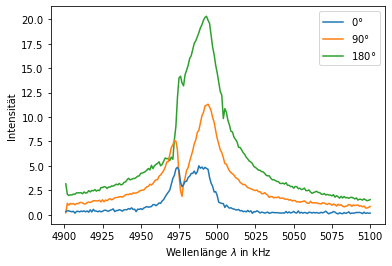

In [106]:
for (x, i) in zip(k5WinkelReihe,k5winkel):
    plt.plot(x[0],x[1],label = f"{i}$\degree$",zorder=-i) 
plt.legend()
plt.xlabel("Wellenlänge $\lambda$ in kHz")
plt.ylabel("Intensität")

plt.savefig('Bilder/qm/Teil1/spektrum-doppelmax.png',dpi=300)


### Orbitale

In [22]:
def P01(theta,a):
    return a*np.abs(np.cos(con.pi/180*theta))
def P02(theta,a):
    return a/2*np.abs(3*np.cos(con.pi/180*theta)**2 -1)
def P03(theta,a):
    return a/2* np.abs(5*np.cos(con.pi/180*theta)**3 -3*np.cos(con.pi/180*theta))
def P04(theta,a):
    return a/8* np.abs(35*np.cos(con.pi/180*theta)**4 -30*np.cos(con.pi/180*theta)**2 + 3)
def P05(theta,a):
    return a/8* np.abs(63*np.cos(con.pi/180*theta)**5 -70*np.cos(con.pi/180*theta)**3 + 15*np.cos(con.pi/180*theta))

In [23]:
orb1 = pd.read_csv("Data/QM1/Teil2/2300Hz.dat",sep=' ',decimal=".",skiprows=2,header=None)
orb2 = pd.read_csv("Data/QM1/Teil2/3700Hz.dat",sep=' ',decimal=".",skiprows=2,header=None)
orb2v2 = pd.read_csv("Data/QM1/Teil2/3700Hz2.dat",sep=' ',decimal=".",skiprows=2,header=None)
orb3 = pd.read_csv("Data/QM1/Teil2/5000Hz2.dat",sep=' ',decimal=".",skiprows=2,header=None)

\SI{[65.13] \pm [2.19]}{}


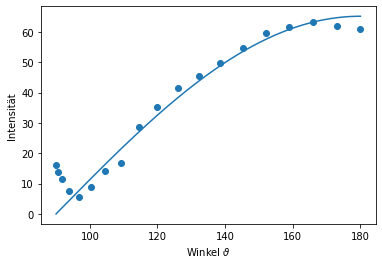

In [132]:
x=orb1[1]
y=orb1[2]
plt.scatter(x,y)
fit=P01
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,2)) + " \pm " + str(np.round(perr,2)) + "}{}")

xf = np.linspace(90,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")
# orb1

plt.xlabel(r"Winkel $\vartheta$")
plt.ylabel("Intensität")

plt.savefig('Bilder/qm/Teil1/orb1.png',dpi=300)

\SI{[147.52] \pm [7.95]}{}
\SI{[151.61] \pm [6.21]}{}


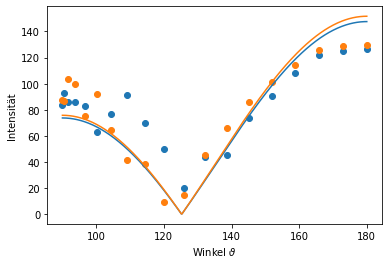

In [133]:
x=orb2[1]
y=orb2[2]
plt.scatter(x,y)
fit=P02
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,2)) + " \pm " + str(np.round(perr,2)) + "}{}")

xf = np.linspace(90,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")

x=orb2v2[1]
y=orb2v2[2]
plt.scatter(x,y)
fit=P02
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,2)) + " \pm " + str(np.round(perr,2)) + "}{}")

xf = np.linspace(90,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")

plt.xlabel(r"Winkel $\vartheta$")
plt.ylabel("Intensität")
plt.savefig('Bilder/qm/Teil1/orb2.png',dpi=300)

\SI{[118.] \pm [7.52]}{}
\SI{[118.5] \pm [10.1]}{}


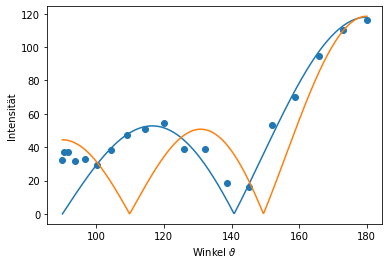

In [139]:
x=orb3[1]
y=orb3[2]
plt.scatter(x,y)
fit=P03
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,2)) + " \pm " + str(np.round(perr,2)) + "}{}")

xf = np.linspace(90,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")

fit=P04
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,1)) + " \pm " + str(np.round(perr,1)) + "}{}")

xf = np.linspace(90,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")
plt.xlabel(r"Winkel $\vartheta$")
plt.ylabel("Intensität")

plt.savefig('Bilder/qm/Teil1/orb3.png',dpi=300)

## 1.3 der Kugelresonator mit Zwischenringen

In [27]:
r0mm = pd.read_csv("Data/QM1/Teil3/0mm.dat",sep=' ',decimal=".",header=None)
r3mm = pd.read_csv("Data/QM1/Teil3/3mm.dat",sep=' ',decimal=".",header=None)
r6mm = pd.read_csv("Data/QM1/Teil3/6mm.dat",sep=' ',decimal=".",header=None)
r9mm = pd.read_csv("Data/QM1/Teil3/9mm.dat",sep=' ',decimal=".",header=None)
l180 = pd.read_csv("Data/QM1/Teil3/laege-180deg.dat",sep=' ',decimal=".",header=None)
ringMessreihen = [r0mm,r3mm,r6mm,r9mm]
dicken=[0,3,6,9]

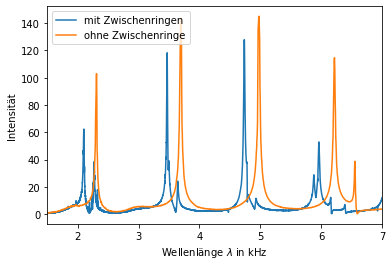

In [112]:
plt.plot(l180[0]/1000,l180[1],label="mit Zwischenringen")
plt.plot(deg180[0]/1000,deg180[1],label="ohne Zwischenringe")
plt.legend()
axes = plt.gca()
axes.set_xlim(1.5,7)
# axes.set_ylim(0,150)
plt.xlabel("Wellenlänge $\lambda$ in kHz")
plt.ylabel("Intensität")

plt.savefig('Bilder/qm/Teil1/spektrum-kugelres-zwischenringe.png',dpi=300)


In [29]:
az1 = pd.read_csv("Data/QM1/Teil3/2.1k.dat",sep=' ',decimal=".",skiprows=2,header=None)
az2 = pd.read_csv("Data/QM1/Teil3/2.3k.dat",sep=' ',decimal=".",skiprows=2,header=None)
az3 = pd.read_csv("Data/QM1/Teil3/3.47k.dat",sep=' ',decimal=".",skiprows=2,header=None)
az4 = pd.read_csv("Data/QM1/Teil3/3.64k.dat",sep=' ',decimal=".",skiprows=2,header=None)
az1

,0,1,2
0,0.0,0.0,59.397
1,10.0,10.0,56.368
2,20.0,20.0,58.741
3,30.0,30.0,58.487
4,40.0,40.0,58.830
5,50.0,50.0,58.374
6,60.0,60.0,59.296
7,70.0,70.0,58.161
8,80.0,80.0,58.668
9,90.0,90.0,59.671


In [30]:
def m0(theta,a):
    return a*np.sign(theta+1)
def m1(theta,a):
    return a*np.abs(np.cos(con.pi/180*theta))
def m2(theta,a):
    return a*np.abs(np.cos(con.pi/90*theta))

\SI{[57.514] \pm [0.623]}{}


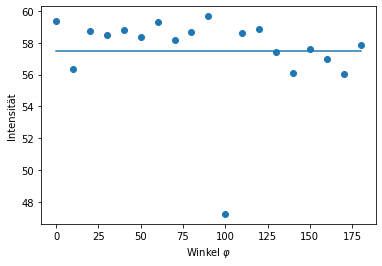

In [142]:
x=az1[1]
y=az1[2]
plt.scatter(x,y)
fit=m0
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,3)) + " \pm " + str(np.round(perr,3)) + "}{}")

xf = np.linspace(0,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")
plt.xlabel(r"Winkel $\varphi$")
plt.ylabel("Intensität")
plt.savefig('Bilder/qm/Teil1/az1.png',dpi=300)


\SI{[31.449] \pm [0.498]}{}


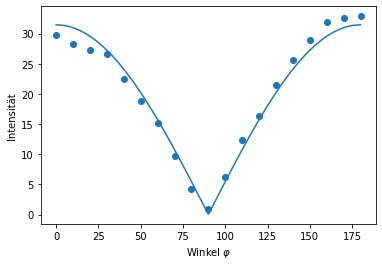

In [143]:
x=az2[1]
y=az2[2]
plt.scatter(x,y)
fit=m1
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,3)) + " \pm " + str(np.round(perr,3)) + "}{}")

xf = np.linspace(0,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")
plt.xlabel(r"Winkel $\varphi$")
plt.ylabel("Intensität")
plt.savefig('Bilder/qm/Teil1/az2.png',dpi=300)


\SI{[118.65] \pm [1.41]}{}


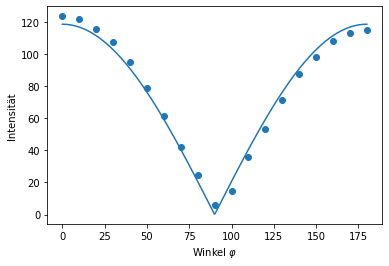

In [137]:
x=az3[1]
y=az3[2]
plt.scatter(x,y)
fit=m1
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,2)) + " \pm " + str(np.round(perr,2)) + "}{}")

xf = np.linspace(0,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")
plt.xlabel(r"Winkel $\varphi$")
plt.ylabel("Intensität")
plt.savefig('Bilder/qm/Teil1/az3.png',dpi=300)


\SI{[20.494] \pm [0.293]}{}


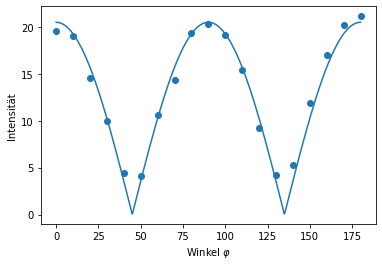

In [144]:
x=az4[1]
y=az4[2]
plt.scatter(x,y)
fit=m2
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print("\SI{" + str(np.round(c,3)) + " \pm " + str(np.round(perr,3)) + "}{}")

xf = np.linspace(0,180,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")
plt.xlabel(r"Winkel $\varphi$")
plt.ylabel("Intensität")
plt.savefig('Bilder/qm/Teil1/az4.png',dpi=300)


[10.0, 62.0, 112.0, 170.0]


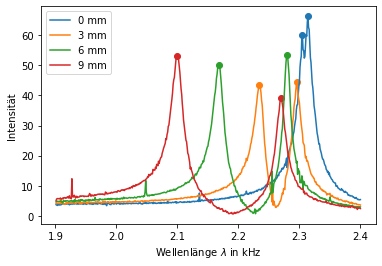

In [117]:
breite = [0]*len(dicken)
for (x, (i,d)) in zip(ringMessreihen,enumerate(dicken)):
    plt.plot(x[0]/1000,x[1],label = f"{d} mm") 
    peaks , _ = find_peaks(x[1],height=30,width =1) 
    plt.scatter(x[0][peaks]/1000,x[1][peaks])
    breite[i] = x [0][peaks[1]]-x[0][peaks[0]]
plt.legend()

print(breite)
axes = plt.gca()
# axes.set_xlim(2250,2350)
# axes.set_ylim(0,150)

plt.xlabel("Wellenlänge $\lambda$ in kHz")
plt.ylabel("Intensität")
plt.savefig('Bilder/qm/Teil1/spektrum-dicken.png',dpi=300)


[17.66666667  8.99999998] [0.39440531 2.21359436]


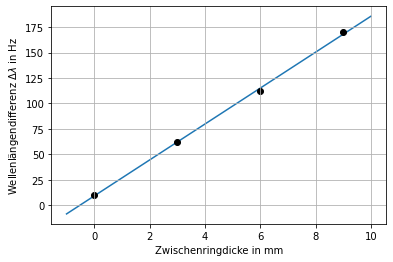

In [118]:
plt.scatter(dicken,breite,c="k")
def gerade(x,m,c):
    return m*x + c

c, cov = curve_fit(gerade, dicken,breite)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

m = [c[0],perr[0]]

xf = np.linspace(-1,10,500)
yf = gerade(xf, c[0],c[1])
plt.plot(xf,yf, label="fit",zorder=0)
plt.xlabel("Zwischenringdicke in mm")
plt.ylabel("Wellenlängendifferenz $\Delta\lambda$ in Hz")

plt.grid()

plt.savefig('Bilder/qm/Teil1/frequenzaufspaltung.png',dpi=300)


# Teil 2

## 2.1 Das Wasserstoffmolekul 

In [95]:
b1 = pd.read_csv("Data/QM2/Teil 1/blende1.dat",sep=' ',decimal=".",header=None)
b2 = pd.read_csv("Data/QM2/Teil 1/blende2.dat",sep=' ',decimal=".",header=None)
b3 = pd.read_csv("Data/QM2/Teil 1/blende3.dat",sep=' ',decimal=".",header=None)
b4 = pd.read_csv("Data/QM2/Teil 1/blende4.dat",sep=' ',decimal=".",header=None)
h0 = pd.read_csv("Data/QM2/Teil 1/0deg.dat",sep=' ',decimal=".",header=None)
h180 = pd.read_csv("Data/QM2/Teil 1/180deg.dat",sep=' ',decimal=".",header=None)
bvgl = pd.read_csv("Data/QM2/Teil 1/vergleichsspektrum.dat",sep=' ',decimal=".",header=None)
blenden = [bvgl,b1,b2,b3,b4]
h = [h0,h180]

Text(0, 0.5, 'Intensität')

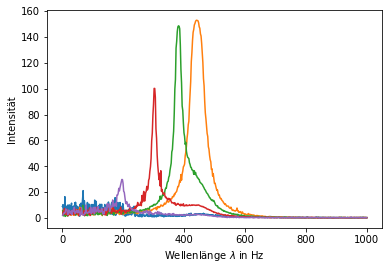

In [96]:
for b in blenden:
    plt.plot(b[0],b[1])
plt.xlabel("Wellenlänge $\lambda$ in Hz")
plt.ylabel("Intensität")

Text(0, 0.5, 'Intensität')

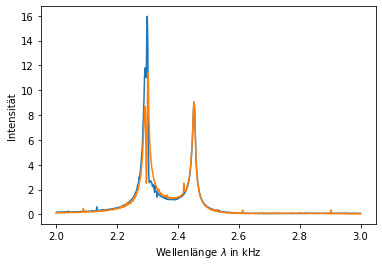

In [97]:
for x in h:
    plt.plot(x[0]/1000,x[1])
plt.xlabel("Wellenlänge $\lambda$ in kHz")
plt.ylabel("Intensität")

## 2.2 Der Rohrresonator mit Blenden

In [629]:
s2 = pd.read_csv("Data/QM2/Teil 2/2segmente.dat",sep=' ',decimal=".",header=None)
s3 = pd.read_csv("Data/QM2/Teil 2/3segmente.dat",sep=' ',decimal=".",header=None)
s4 = pd.read_csv("Data/QM2/Teil 2/4segmente.dat",sep=' ',decimal=".",header=None)
einzel = pd.read_csv("Data/QM2/Teil 2/einzelsegment.dat",sep=' ',decimal=".",header=None)

max12mit = pd.read_csv("Data/QM2/Teil 2/max-12seg-mit.dat",sep=' ',decimal=".",header=None)
max12no8 = pd.read_csv("Data/QM2/Teil 2/max-12seg-no8lang.dat",sep=' ',decimal=".",header=None)
max12ohne = pd.read_csv("Data/QM2/Teil 2/max-12seg-ohne.dat",sep=' ',decimal=".",header=None)
max8 = pd.read_csv("Data/QM2/Teil 2/max-8seg.dat",sep=' ',decimal=".",header=None)
segmente= [einzel,s2,s3,s4]
seg = [1,2,3,4]
laengen = np.multiply(0.075,seg)
max12 = [max12ohne,max12mit,max12no8]
l12 = [12*0.05,12*0.05,11*0.05+0.075]

(0.0, 9.0)

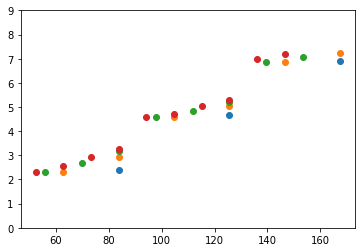

In [703]:
for (i,l,s)  in zip(segmente,laengen,seg):
    x = i[0][300:1600]
    y = i[1][300:1600]
    # plt.plot(x,y)threshold
    peaks , _ = find_peaks(y,width=6,prominence= 30,height=20)
    # plt.scatter(x[peaks] , y[peaks])
    # print(x[peaks])
    plt.scatter(con.pi*np.add(range(len(x[peaks+300])),1+s)/l,x[peaks+300]/1000)
axes = plt.gca()
# axes.set_xlim(-100,4000)
axes.set_ylim(0,9)

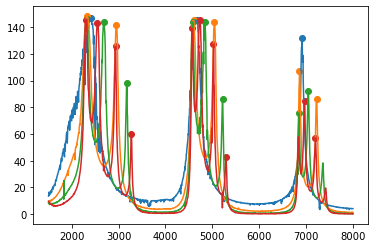

In [580]:
for (i,l,s)  in zip(segmente,laengen,seg):
    x = i[0][300:1600]
    y = i[1][300:1600]
    plt.plot(x,y)
    peaks , _ = find_peaks(y,width=6,prominence= 30,height=20)
    plt.scatter(x[peaks+300] , y[peaks+300])
    # print(x[peaks])
    # plt.scatter(np.add(range(len(x[peaks+300])),1+s)/l,x[peaks+300])
axes = plt.gca()
# axes.set_xlim(-100,4000)
#axes.set_ylim(0,40)

(2000.0, 8000.0)

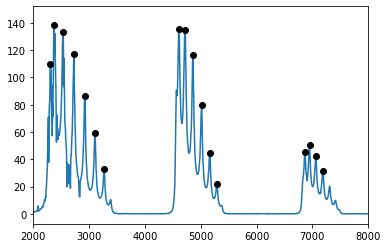

In [671]:

i=max8
x=i[0]
y=i[1]

plt.plot(x,y,zorder=0)

peaks , _ = find_peaks(y, prominence =10 ,width = 5 )
# height = peaks[1]['peak_heights']
peak_pos_mit = x[peaks]
plt.scatter(x[peaks] , y[peaks],c="k")
axes = plt.gca()
axes.set_xlim(2000,8000)
#axes.set_ylim(0,40)

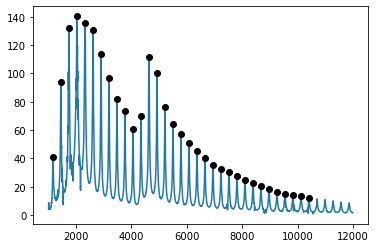

In [674]:

i=max12[0]
x=i[0][200:]
y=i[1][200:]

plt.plot(x,y,zorder=0)

peaks , _ = find_peaks(y, prominence =10 ,width = 4 )
# height = peaks[1]['peak_heights']
peak_pos_mit = x[peaks+200]
plt.scatter(x[peaks+200] , y[peaks+200],c="k")
axes = plt.gca()
# axes.set_xlim(2000,8000)
#axes.set_ylim(0,40)

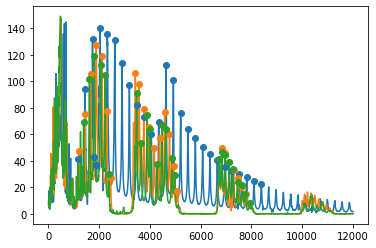

In [685]:

for i in max12:
    x=i[0][200:1700]
    y=i[1][200:1700]

    plt.plot(i[0],i[1],zorder=0)

    peaks , _ = find_peaks(y, prominence =5 ,width = 5 )
    # height = peaks[1]['peak_heights']
    peak_pos_mit = x[peaks+200]
    plt.scatter(x[peaks+200] , y[peaks+200])
axes = plt.gca()
# axes.set_xlim(2000,8000)
#axes.set_ylim(0,40)

(0.0, 9.0)

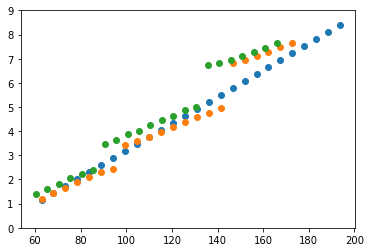

In [705]:

for (i,l)  in zip(max12,l12):
    x=i[0][200:1700]
    y=i[1][200:1700]

    # plt.plot(x,y,zorder=0)

    peaks , _ = find_peaks(y, prominence =10 ,width = 5 )
    # height = peaks[1]['peak_heights']
    peak_pos_mit = x[peaks+200]
    # plt.scatter(x[peaks] , y[peaks])
    plt.scatter(con.pi/l* np.add( range(len(x[peaks+200])),12),x[peaks+200]/1000)
axes = plt.gca()
# axes.set_xlim(2000,8000)
axes.set_ylim(0,9)

12
13
18
20


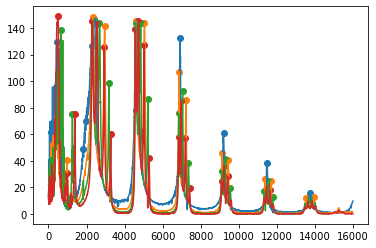

In [606]:
laengen = [0.075,0.075*2,0.075*3,0.075*4,0.075*8]
for (x ,l) in zip (segmente, laengen):
    plt.plot(x[0],x[1])
    peaks , _ = find_peaks(x[1],height=10,width=5,prominence= 5)
    plt.scatter(x[0][peaks] , x[1][peaks])
    print(len(x[0][peaks]))
axes = plt.gca()
# axes.set_xlim(0,2000)
#axes.set_ylim(0,40)

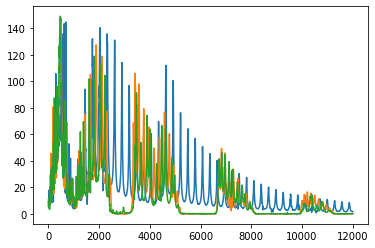

In [45]:
for x in max12:
    plt.plot(x[0],x[1])